In [1]:
import sys
import os
import pandas as pd
import re

sys.path.append(os.path.abspath("../../ml/"))

from dev_wtp_io_utils import *

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
nonbids_data_path = "/gpfs/projects/sanlab/shared/DEV/nonbids_data/"
ml_data_folderpath = "/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml"

In [3]:
#test_train_df_raw = pd.read_csv(nonbids_data_path + "fMRI/ml/train_test_markers_20210601T183243.csv")
test_train_df_raw = pd.read_csv(nonbids_data_path + "fMRI/ml/train_test_markers_20211027T173724.csv")


In [4]:
include_exclude_list = pd.read_csv("../nsc_subject_exclusions.csv")

In [5]:
test_train_df_raw = test_train_df_raw.merge(include_exclude_list[include_exclude_list.Task=='SST'],left_on='sub_label',right_on='SubjectId',how='left')
test_train_df_raw.loc[test_train_df_raw.Include.isna(),'Include'] = True
test_train_df = test_train_df_raw[test_train_df_raw.Include==True]

In [6]:
exclude_subjects = ['DEV061','DEV185','DEV187','DEV189','DEV190','DEV192','DEV198','DEV203','DEV220','DEV221']

In [7]:
train_subjs = test_train_df.loc[test_train_df.SplitGroup=='Train','sub_label'].tolist()#only get the train subjects; ignore those previously marked hold-out

In [8]:
test_train_df

,sub_label,SplitGroup,AssignedInJune,SubjectId,Task,Include
1,DEV004,Holdout,True,NaN,NaN,True
2,DEV005,Train,True,NaN,NaN,True
3,DEV006,Train,True,NaN,NaN,True
4,DEV008,Holdout,True,NaN,NaN,True
5,DEV009,Train,True,NaN,NaN,True
...,...,...,...,...,...,...
184,DEV221,Train,False,NaN,NaN,True
185,DEV222,Holdout,False,NaN,NaN,True
186,DEV223,Holdout,False,NaN,NaN,True
187,DEV224,Holdout,False,NaN,NaN,True


In [9]:
def get_Brain_Data_for_sub(sub_label,behavdesign,betaseries_path='/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/fx/models/SST/wave1/betaseries/'):
    return(dev_wtp_io_utils.get_Brain_Data_betas_for_sub(sub_label,behavdesign,betaseries_path))

In [10]:
from dev_wtp_io_utils import import_sst_cond_w1_subjs_to_pkl

In [11]:
import_sst_cond_w1_subjs_to_pkl(
    train_subjs[0:2],'conditions',
    out_folder = ml_data_folderpath + "/")

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/fx/models/SST/wave1/conditions/
DEV005
   condition_index condition_label  \
0                0       CorrectGo   
1                1     CorrectStop   
2                2      FailedStop   
3                3             Cue   
4                4        FailedGo   

                            raw_beta_description           beta subject  wave  
0    spm_spm:beta (0001) - Sn(1) CorrectGo*bf(1)  beta_0001.nii  DEV005     1  
1  spm_spm:beta (0002) - Sn(1) CorrectStop*bf(1)  beta_0002.nii  DEV005     1  
2   spm_spm:beta (0003) - Sn(1) FailedStop*bf(1)  beta_0003.nii  DEV005     1  
3          spm_spm:beta (0004) - Sn(1) Cue*bf(1)  beta_0004.nii  DEV005     1  
4     spm_spm:beta (0005) - Sn(1) FailedGo*bf(1)  beta_0005.nii  DEV005     1  
........verified that all expected betas exist! Processing...setting the mask to the first image in the series beta_0001.nii
temp mask created.
loading files. This step may take some time...
converting

OK, not bad, so we have learned to load data, and show it. We might be best to re-write the code, though, to use the first image as the image series's own mask--using `nilearn.masking.compute_brain_mask`, rather than worry about why the input mask isn't quite aligned. 

In [12]:
len(train_subjs)

93

### With supplementary data

In [13]:
individual_differences = pd.read_csv(ml_data_folderpath + "/data_by_ppt.csv")
individual_differences = individual_differences.rename(columns={'SID':'subject'})
individual_differences['wave']=1
#individual_differences['wave'] = individual_differences['wave'].astype(object) # for compatibility with the wave column in the dataset

In [14]:
#we have data missing fro mthese subjects below. not enstirely sure yet; see 
#https://docs.google.com/document/d/1EB0ACA6qhMkDEgv-zqNTepPCe_x41fRQHaeqT47vazM/edit#heading=h.60rb13rlxkrq


train_subjs_selected = [ts for ts in train_subjs if (ts not in exclude_subjects)]

## concatenating conditions

In [16]:
from nilearn import plotting
from nilearn.masking import compute_brain_mask
import nltools as nlt
import nilearn as nil

In [17]:
from nltools import Brain_Data

In [18]:
import_sst_cond_w1_subjs_to_pkl(
    train_subjs_selected[0:2],'conditions',
    out_folder = ml_data_folderpath + "/SST/",
    conditions_to_include = ['CorrectGo','CorrectStop'],
    condition_count_required=2,
    supplementary_df = individual_differences,
    out_file_suffix = '_correct_cond_spatially_concatenated',
    concatenate_condition_labels=True
)

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/fx/models/SST/wave1/conditions/
DEV005
   condition_index condition_label  \
0                0       CorrectGo   
1                1     CorrectStop   

                            raw_beta_description           beta subject  wave  
0    spm_spm:beta (0001) - Sn(1) CorrectGo*bf(1)  beta_0001.nii  DEV005     1  
1  spm_spm:beta (0002) - Sn(1) CorrectStop*bf(1)  beta_0002.nii  DEV005     1  
.....verified that all expected betas exist! Processing...setting the mask to the first image in the series beta_0001.nii
temp mask created.
loading files. This step may take some time...
converting to nifti and fdata
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/fx/models/SST/wave1/conditions/temp_mask_get_Brain_Data_betas_for_sub_DEV005.nii
  subject  wave
0  DEV005     1
...imported data.
temp mask deleted
DEV006
   condition_index condition_label  \
0                0       CorrectGo   
1                1     CorrectStop   

               

In [19]:
out_data = pickle.load(open(
    '/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/Brain_Data_conditions_2subs_correct_cond_w_supplementary_mask_fix.pkl','rb'
))

In [20]:
out_data.shape

<bound method Brain_Data.shape of nltools.data.brain_data.Brain_Data(data=(2, 433486), Y=0, X=(2, 127), mask=temp_mask_get_Brain_Data_betas_for_sub_DEV005.nii, output_file=[])>

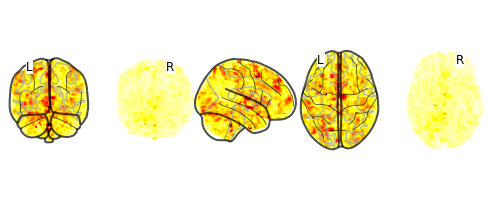

In [21]:
plotting.plot_glass_brain(out_data[0,].to_nifti())

In [24]:
import_sst_cond_w1_subjs_to_pkl(
    train_subjs_selected,'conditions',
    out_folder = ml_data_folderpath + "/SST/",
    conditions_to_include = ['CorrectGo','CorrectStop'],
    condition_count_required=2,
    supplementary_df = individual_differences,
    out_file_suffix = '_correct_cond_spatially_concatenated',
    concatenate_condition_labels=True
)

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/fx/models/SST/wave1/conditions/
DEV005
   condition_index condition_label  \
0                0       CorrectGo   
1                1     CorrectStop   

                            raw_beta_description           beta subject  wave  
0    spm_spm:beta (0001) - Sn(1) CorrectGo*bf(1)  beta_0001.nii  DEV005     1  
1  spm_spm:beta (0002) - Sn(1) CorrectStop*bf(1)  beta_0002.nii  DEV005     1  
.....verified that all expected betas exist! Processing...setting the mask to the first image in the series beta_0001.nii
temp mask created.
loading files. This step may take some time...
converting to nifti and fdata
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/fx/models/SST/wave1/conditions/temp_mask_get_Brain_Data_betas_for_sub_DEV005.nii
  subject  wave
0  DEV005     1
...imported data.
temp mask deleted
DEV006
   condition_index condition_label  \
0                0       CorrectGo   
1                1     CorrectStop   

               

.....verified that all expected betas exist! Processing...setting the mask to the first image in the series beta_0001.nii
temp mask created.
loading files. This step may take some time...
converting to nifti and fdata
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/fx/models/SST/wave1/conditions/temp_mask_get_Brain_Data_betas_for_sub_DEV019.nii
  subject  wave
0  DEV019     1
...imported data.
temp mask deleted
DEV020
   condition_index condition_label  \
0                0       CorrectGo   
1                1     CorrectStop   

                            raw_beta_description           beta subject  wave  
0    spm_spm:beta (0001) - Sn(1) CorrectGo*bf(1)  beta_0001.nii  DEV020     1  
1  spm_spm:beta (0002) - Sn(1) CorrectStop*bf(1)  beta_0002.nii  DEV020     1  
.....verified that all expected betas exist! Processing...setting the mask to the first image in the series beta_0001.nii
temp mask created.
loading files. This step may take some time...
converting to nifti and fdata
/g

  subject  wave
0  DEV030     1
...imported data.
temp mask deleted
DEV034
   condition_index condition_label  \
0                0       CorrectGo   
1                1     CorrectStop   

                            raw_beta_description           beta subject  wave  
0    spm_spm:beta (0001) - Sn(1) CorrectGo*bf(1)  beta_0001.nii  DEV034     1  
1  spm_spm:beta (0002) - Sn(1) CorrectStop*bf(1)  beta_0002.nii  DEV034     1  
.....verified that all expected betas exist! Processing...setting the mask to the first image in the series beta_0001.nii
temp mask created.
loading files. This step may take some time...
converting to nifti and fdata
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/fx/models/SST/wave1/conditions/temp_mask_get_Brain_Data_betas_for_sub_DEV034.nii
  subject  wave
0  DEV034     1
...imported data.
temp mask deleted
DEV035
   condition_index condition_label  \
0                0       CorrectGo   
1                1     CorrectStop   

                            ra

.....verified that all expected betas exist! Processing...setting the mask to the first image in the series beta_0001.nii
temp mask created.
loading files. This step may take some time...
converting to nifti and fdata
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/fx/models/SST/wave1/conditions/temp_mask_get_Brain_Data_betas_for_sub_DEV048.nii
  subject  wave
0  DEV048     1
...imported data.
temp mask deleted
DEV049
   condition_index condition_label  \
0                0       CorrectGo   
1                1     CorrectStop   

                            raw_beta_description           beta subject  wave  
0    spm_spm:beta (0001) - Sn(1) CorrectGo*bf(1)  beta_0001.nii  DEV049     1  
1  spm_spm:beta (0002) - Sn(1) CorrectStop*bf(1)  beta_0002.nii  DEV049     1  
.....verified that all expected betas exist! Processing...setting the mask to the first image in the series beta_0001.nii
temp mask created.
loading files. This step may take some time...
converting to nifti and fdata
/g

   condition_index condition_label  \
0                0       CorrectGo   
1                1     CorrectStop   

                            raw_beta_description           beta subject  wave  
0    spm_spm:beta (0001) - Sn(1) CorrectGo*bf(1)  beta_0001.nii  DEV060     1  
1  spm_spm:beta (0002) - Sn(1) CorrectStop*bf(1)  beta_0002.nii  DEV060     1  
.....verified that all expected betas exist! Processing...setting the mask to the first image in the series beta_0001.nii
temp mask created.
loading files. This step may take some time...
converting to nifti and fdata
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/fx/models/SST/wave1/conditions/temp_mask_get_Brain_Data_betas_for_sub_DEV060.nii
  subject  wave
0  DEV060     1
...imported data.
temp mask deleted
DEV062
   condition_index condition_label  \
0                0       CorrectGo   
1                1     CorrectStop   

                            raw_beta_description           beta subject  wave  
0    spm_spm:beta (0001) 

.....verified that all expected betas exist! Processing...setting the mask to the first image in the series beta_0001.nii
temp mask created.
loading files. This step may take some time...
converting to nifti and fdata
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/fx/models/SST/wave1/conditions/temp_mask_get_Brain_Data_betas_for_sub_DEV077.nii
  subject  wave
0  DEV077     1
...imported data.
temp mask deleted
DEV079
   condition_index condition_label  \
0                0       CorrectGo   
1                1     CorrectStop   

                            raw_beta_description           beta subject  wave  
0    spm_spm:beta (0001) - Sn(1) CorrectGo*bf(1)  beta_0001.nii  DEV079     1  
1  spm_spm:beta (0002) - Sn(1) CorrectStop*bf(1)  beta_0002.nii  DEV079     1  
.....verified that all expected betas exist! Processing...setting the mask to the first image in the series beta_0001.nii
temp mask created.
loading files. This step may take some time...
converting to nifti and fdata
/g

.....verified that all expected betas exist! Processing...setting the mask to the first image in the series beta_0001.nii
temp mask created.
loading files. This step may take some time...
converting to nifti and fdata
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/fx/models/SST/wave1/conditions/temp_mask_get_Brain_Data_betas_for_sub_DEV135.nii
  subject  wave
0  DEV135     1
...imported data.
temp mask deleted
DEV141
   condition_index condition_label  \
0                0       CorrectGo   
1                1     CorrectStop   

                            raw_beta_description           beta subject  wave  
0    spm_spm:beta (0001) - Sn(1) CorrectGo*bf(1)  beta_0001.nii  DEV141     1  
1  spm_spm:beta (0002) - Sn(1) CorrectStop*bf(1)  beta_0002.nii  DEV141     1  
.....verified that all expected betas exist! Processing...setting the mask to the first image in the series beta_0001.nii
temp mask created.
loading files. This step may take some time...
converting to nifti and fdata
/g

.....verified that all expected betas exist! Processing...setting the mask to the first image in the series beta_0001.nii
temp mask created.
loading files. This step may take some time...
converting to nifti and fdata
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/fx/models/SST/wave1/conditions/temp_mask_get_Brain_Data_betas_for_sub_DEV186.nii
  subject  wave
0  DEV186     1
...imported data.
temp mask deleted
DEV197
   condition_index condition_label  \
0                0       CorrectGo   
1                1     CorrectStop   

                            raw_beta_description           beta subject  wave  
0    spm_spm:beta (0001) - Sn(1) CorrectGo*bf(1)  beta_0001.nii  DEV197     1  
1  spm_spm:beta (0002) - Sn(1) CorrectStop*bf(1)  beta_0002.nii  DEV197     1  
.....verified that all expected betas exist! Processing...setting the mask to the first image in the series beta_0001.nii
temp mask created.
loading files. This step may take some time...
converting to nifti and fdata
/g

## post-error conditions

In [ ]:
def import_sst_cond_w1_subjs_to_pkl(subjs,first_level_fileid,out_folder = '../data/', 
                                    conditions_to_include=None,
                                    condition_count_required=None,
                                    supplementary_df = None,
                                         out_file_suffix =''):
    ## get a list of the subject folders
    sst_wt_repo = '/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/fx/models/SST/wave1/'
    first_level_path = sst_wt_repo + first_level_fileid + "/"
    print(first_level_path)
    subj_count = len(subjs)
    ## iterate through them
    subjs.sort()
    bd_dict={}
    #get the brain data from the beta files
    for sl in subjs:
        print(sl)
        
        #get the design data
        
        #load the matrix associated with this file
        print(first_level_path + 'sub-' + sl +'/SPM.mat')
        sl_mat = scipy.io.loadmat(
            first_level_path + 'sub-' + sl +'/SPM.mat',
            simplify_cells=True            
        )

        #convert from an SPM.mat file into a dataframe list of the betas
        beta_dict_list = []
        mat_betas = sl_mat['SPM']['Vbeta']
        for beta_i in range(len(mat_betas)):
            beta = mat_betas[beta_i]
            b_description = beta['descrip']
            condition_label = re.search('Sn\(1\)\s(.*)\*bf\(1\)',b_description)
            print(condition_label)
            if (condition_label is not None):
                beta_dict_list = beta_dict_list + [{
                    'condition_index':beta_i,
                    'condition_label':condition_label.group(1),
                    'raw_beta_description':beta['descrip'],
                    'beta':beta['fname']
                }]
        #    print(condition_label)
        beta_df = pd.DataFrame(beta_dict_list)

        #fill in the details related to the subject
        beta_df['subject']=sl
        beta_df['wave']=1
        
        if conditions_to_include is not None:
            #cut down conditions to just those specified
            #print(beta_df.condition_label)
            beta_df = beta_df.loc[beta_df.condition_label.isin(conditions_to_include),]
            #print(beta_df.condition_label)

        if condition_count_required is not None:
            if beta_df.shape[0]<condition_count_required:
                print("not enough conditions for subject "+ sl + ". Skipping this subject.")
                continue
        
        
        try: 
            bd = get_Brain_Data_betas_for_sub(
                sl, beta_df,
                betaseries_path = first_level_path,
                events_in_design=beta_df.shape[0],
                mask = "beta" # '/projects/sanlab/shared/spm12/canonical/MNI152_T1_1mm_brain_mask.nii'
            )
            bd_dict[sl]=bd
        except BehavioralDataNotFoundForBrainDataException:
            print("couldn't get data for subject " + sl + " because there was no matching behavioral data")

    #now append into a concatenated brain data file
    Brain_Data_allsubs = list(bd_dict.values())[0]
    for i in range(1,len(bd_dict.values())):
        print(i)
        val_to_append = list(bd_dict.values())[i]
        Brain_Data_allsubs= Brain_Data_allsubs.append(val_to_append)
        
    if supplementary_df is not None:
        Brain_Data_allsubs.X = pd.merge(Brain_Data_allsubs.X,supplementary_df,how='left',on=['subject','wave'])

    #dump
    out_filepath = (
        out_folder + 'Brain_Data_' +
        #'betaseries_' +
        first_level_fileid + '_' + str(subj_count) + 'subs' + out_file_suffix + '.pkl'
    )
    print(out_filepath)

    with open(out_filepath, 'wb') as pkl_file:
        pickle.dump(Brain_Data_allsubs,pkl_file)


In [99]:
sl_mat = scipy.io.loadmat(
            first_level_path + 'sub-' + sl +'/SPM.mat',
            simplify_cells=True            
        )

NameError: name 'first_level_path' is not defined

In [100]:
#we have data missing fro mthese subjects below. not enstirely sure yet; see 
#https://docs.google.com/document/d/1EB0ACA6qhMkDEgv-zqNTepPCe_x41fRQHaeqT47vazM/edit#heading=h.60rb13rlxkrq

train_subjs_selected = [ts for ts in train_subjs if (ts not in exclude_subjects)]